# Elections présidentielles

## 0. Import des bibliothèques, des données et settings

### Import des bibliothèques

In [1]:
# Datasets analysis libraries 
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# math library
import math
import statistics

# warning management library
import warnings

# DOS like library
import os

# nan visualization
import missingno as msno

### Gestion des warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Chargement des données

In [3]:
current_path=os.getcwd()
current_path

"/home/emma_sylvain/Recherche d'Emploi/Maskott/Test_technique/elections_presidentielles/notebooks"

In [4]:
data_path="/home/emma_sylvain/Recherche d'Emploi/Maskott/Test_technique/elections_presidentielles/data/"

In [5]:
# Le fichier fourni était corrompu, ceclui ci a été trouvé sur le site du gouvernement.
data_resultat_path=data_path+'resultats-par-niveau-burvot-t1-france-entiere.xlsx'

In [6]:
# Fichier très long à télécharger en mode normal
#df_results=pd.read_excel(data_resultat_path, nrows=1, engine='openpyxl')

In [7]:
#df_results.shape

In [8]:
#df_results

#### Tentative de lecture du fichier .txt sur le site du gouvernement

In [9]:
# téléchargement au format .txt
data_resultat_path=data_path+'resultats-par-niveau-burvot-t1-france-entiere.txt'

In [10]:
# Fichier .txt
df_results=pd.read_csv(data_resultat_path, engine='python', sep=';',encoding='latin1')

In [11]:
df_results.shape

(69682, 28)

In [12]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 69682 entries, ('01', 'Ain', 4, '4ème circonscription', 1, "L'Abergement-Clémenciat", '0001', 645, 108, '16,74', 537, '83,26', 16, '2,48', '2,98', 1, '0,16', '0,19', 520, '80,62', '96,83', 1, 'F', 'ARTHAUD', 'Nathalie', 3, '0,47', '0,58', 2, 'M', 'ROUSSEL', 'Fabien', 6, '0,93', '1,15', 3, 'M', 'MACRON', 'Emmanuel', 150, '23,26', '28,85', 4, 'M', 'LASSALLE', 'Jean', 18, '2,79', '3,46', 5, 'F', 'LE PEN', 'Marine', 149, '23,10', '28,65', 6, 'M', 'ZEMMOUR', 'Éric', 43, '6,67', '8,27', 7, 'M', 'MÉLENCHON', 'Jean-Luc', 66, '10,23', '12,69', 8, 'F', 'HIDALGO', 'Anne', 5, '0,78', '0,96') to ('ZZ', 'Français établis hors de France', 2, '2ème circonscription', 235, 'Bahamas (Nassau)', '0001', 136, 78, '57,35', 58, '42,65', 3, '2,21', '5,17', 0, '0,00', '0,00', 55, '40,44', '94,83', 1, 'F', 'ARTHAUD', 'Nathalie', 0, '0,00', '0,00', 2, 'M', 'ROUSSEL', 'Fabien', 1, '0,74', '1,82', 3, 'M', 'MACRON', 'Emmanuel', 25, '18,38', '45,45', 4, 'M', 'LASSALLE

In [13]:
df_results.head()

Code du département Libellé du département Code de la circonscription Libellé de la circonscription  Code de la commune Libellé de la commune Code du b.vote  Inscrits Abstentions % Abs/Ins  Votants  % Vot/Ins Blancs % Blancs/Ins  % Blancs/Vot Nuls % Nuls/Ins % Nuls/Vot  Exprimés % Exp/Ins % Exp/Vot  N°Panneau Sexe            Nom   Prénom  Voix % Voix/Ins % Voix/Exp
01 Ain 4 4ème circonscription 1 L'Abergement-Clémenciat 0001 645  108 16,74 537 83,26 16 2,48 2,98 1 0,16 0,19 520 80,62 96,83 1 F ARTHAUD Nathalie 3 0,47 0,58 2 M ROUSSEL Fabien 6  0,93 1,15 3 M MACRON Emmanuel 150 23,26 28,85 4 M LASSALLE Jean 18 2,79 3,46 5 F LE PEN Marine 149 23,10 28,65 6 M ZEMMOUR Éric 43 6,67 8,27 7 M MÉLENCHON Jean-Luc 66  10,23 12,69 8 F HIDALGO Anne 5  0,78 0,96                    9                      M                      JADOT                       Yannick                  30                  4,65           5,77        10           F  PÉCRESSE  Valérie         26   4,03         5,00            11    M     POUTOU   Philippe         3      0,47      0,58         12    M  DUPONT-AIGNAN  Nicolas    21       3,26       4,04
       5 5ème circonscription 2 L'Abergement-de-Varey   0001 213  38  17,84 175 82,16 3  1,41 1,71 1 0,47 0,57 171 80,28 97,71 1 F ARTHAUD Nathalie 2 0,94 1,17 2 M ROUSSEL Fabien 7  3,29 4,09 3 M MACRON Emmanuel 50  23,47 29,24 4 M LASSALLE Jean 10 4,69 5,85 5 F LE PEN Marine 23  10,80 13,45 6 M ZEMMOUR Éric 14 6,57 8,19 7 M MÉLENCHON Jean-Luc 41  19,25 23,98 8 F HIDALGO Anne 3  1,41 1,75                    9                      M                      JADOT                       Yannick                  10                  4,69           5,85        10           F  PÉCRESSE  Valérie          8   3,76         4,68            11    M     POUTOU   Philippe         3      1,41      1,75         12    M  DUPONT-AIGNAN  Nicolas     0       0,00       0,00
                              4 Ambérieu-en-Bugey       0001 1129 266 23,56 863 76,44 18 1,59 2,09 5 0,44 0,58 840 74,40 97,33 1 F ARTHAUD Nathalie 4 0,35 0,48 2 M ROUSSEL Fabien 30 2,66 3,57 3 M MACRON Emmanuel 159 14,08 18,93 4 M LASSALLE Jean 24 2,13 2,86 5 F LE PEN Marine 237 20,99 28,21 6 M ZEMMOUR Éric 69 6,11 8,21 7 M MÉLENCHON Jean-Luc 216 19,13 25,71 8 F HIDALGO Anne 15 1,33 1,79                    9                      M                      JADOT                       Yannick                  25                  2,21           2,98        10           F  PÉCRESSE  Valérie         40   3,54         4,76            11    M     POUTOU   Philippe         8      0,71      0,95         12    M  DUPONT-AIGNAN  Nicolas    13       1,15       1,55
                                                        0002 1128 265 23,49 863 76,51 15 1,33 1,74 6 0,53 0,70 842 74,65 97,57 1 F ARTHAUD Nathalie 6 0,53 0,71 2 M ROUSSEL Fabien 13 1,15 1,54 3 M MACRON Emmanuel 201 17,82 23,87 4 M LASSALLE Jean 19 1,68 2,26 5 F LE PEN Marine 210 18,62 24,94 6 M ZEMMOUR Éric 68 6,03 8,08 7 M MÉLENCHON Jean-Luc 194 17,20 23,04 8 F HIDALGO Anne 19 1,68 2,26                    9                      M                      JADOT                       Yannick                  46                  4,08           5,46        10           F  PÉCRESSE  Valérie         42   3,72         4,99            11    M     POUTOU   Philippe         4      0,35      0,48         12    M  DUPONT-AIGNAN  Nicolas    20       1,77       2,38
                                                        0003 1213 246 20,28 967 79,72 10 0,82 1,03 8 0,66 0,83 949 78,24 98,14 1 F ARTHAUD Nathalie 8 0,66 0,84 2 M ROUSSEL Fabien 18 1,48 1,90 3 M MACRON Emmanuel 229 18,88 24,13 4 M LASSALLE Jean 28 2,31 2,95 5 F LE PEN Marine 227 18,71 23,92 6 M ZEMMOUR Éric 74 6,10 7,80 7 M MÉLENCHON Jean-Luc 227 18,71 23,92 8 F HIDALGO Anne 16 1,32 1,69                    9                      M                      JADOT                       Yannick                  65                  5,36           6,85        10           F  PÉCRESSE  Valér

#### L'agencement du dataframe n'est pas utilisable tel quel

#### Conversion du fichier .xlsx au format .csv grâce à openOffice

In [14]:
data_resultat_path=data_path+'resultats-par-niveau-burvot-t1-france-entiere.csv'
df_results=pd.read_csv(data_resultat_path)

In [15]:
df_results.head()

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,0001,645,108,"16,74",537,"83,26",16,"2,48","2,98",1,"0,16","0,19",520,"80,62","96,83",1,F,ARTHAUD,Nathalie,3,"0,47","0,58",2,M,ROUSSEL,Fabien,6,"0,93","1,15",3,M,MACRON,Emmanuel,150,"23,26","28,85",4,M,LASSALLE,Jean,18,"2,79","3,46",5,F,LE PEN,Marine,149,"23,1","28,65",6,M,ZEMMOUR,Éric,43,"6,67","8,27",7,M,MÉLENCHON,Jean-Luc,66,"10,23","12,69",8,F,HIDALGO,Anne,5,"0,78","0,96",9,M,JADOT,Yannick,30,"4,65","5,77",10,F,PÉCRESSE,Valérie,26,"4,03",5,11,M,POUTOU,Philippe,3,"0,47","0,58",12,M,DUPONT-AIGNAN,Nicolas,21,"3,26","4,04"
1,1,Ain,5,5ème circonscription,2,L'Abergement-de-Varey,0001,213,38,"17,84",175,"82,16",3,"1,41","1,71",1,"0,47","0,57",171,"80,28","97,71",1,F,ARTHAUD,Nathalie,2,"0,94","1,17",2,M,ROUSSEL,Fabien,7,"3,29","4,09",3,M,MACRON,Emmanuel,50,"23,47","29,24",4,M,LASSALLE,Jean,10,"4,69","5,85",5,F,LE PEN,Marine,23,"10,8","13,45",6,M,ZEMMOUR,Éric,14,"6,57","8,19",7,M,MÉLENCHON,Jean-Luc,41,"19,25","23,98",8,F,HIDALGO,Anne,3,"1,41","1,75",9,M,JADOT,Yannick,10,"4,69","5,85",10,F,PÉCRESSE,Valérie,8,"3,76","4,68",11,M,POUTOU,Philippe,3,"1,41","1,75",12,M,DUPONT-AIGNAN,Nicolas,0,0,0
2,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,0001,1129,266,"23,56",863,"76,44",18,"1,59","2,09",5,"0,44","0,58",840,"74,4","97,33",1,F,ARTHAUD,Nathalie,4,"0,35","0,48",2,M,ROUSSEL,Fabien,30,"2,66","3,57",3,M,MACRON,Emmanuel,159,"14,08","18,93",4,M,LASSALLE,Jean,24,"2,13","2,86",5,F,LE PEN,Marine,237,"20,99","28,21",6,M,ZEMMOUR,Éric,69,"6,11","8,21",7,M,MÉLENCHON,Jean-Luc,216,"19,13","25,71",8,F,HIDALGO,Anne,15,"1,33","1,79",9,M,JADOT,Yannick,25,"2,21","2,98",10,F,PÉCRESSE,Valérie,40,"3,54","4,76",11,M,POUTOU,Philippe,8,"0,71","0,95",12,M,DUPONT-AIGNAN,Nicolas,13,"1,15","1,55"
3,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,0002,1128,265,"23,49",863,"76,51",15,"1,33","1,74",6,"0,53","0,7",842,"74,65","97,57",1,F,ARTHAUD,Nathalie,6,"0,53","0,71",2,M,ROUSSEL,Fabien,13,"1,15","1,54",3,M,MACRON,Emmanuel,201,"17,82","23,87",4,M,LASSALLE,Jean,19,"1,68","2,26",5,F,LE PEN,Marine,210,"18,62","24,94",6,M,ZEMMOUR,Éric,68,"6,03","8,08",7,M,MÉLENCHON,Jean-Luc,194,"17,2","23,04",8,F,HIDALGO,Anne,19,"1,68","2,26",9,M,JADOT,Yannick,46,"4,08","5,46",10,F,PÉCRESSE,Valérie,42,"3,72","4,99",11,M,POUTOU,Philippe,4,"0,35","0,48",12,M,DUPONT-AIGNAN,Nicolas,20,"1,77","2,38"
4,1,Ain,5,5ème circonscription,4,Ambérieu-en-Bugey,0003,1213,246,"20,28",967,"79,72",10,"0,82","1,03",8,"0,66","0,83",949,"78,24","98,14",1,F,ARTHAUD,Nathalie,8,"0,66","0,84",2,M,ROUSSEL,Fabien,18,"1,48","1,9",3,M,MACRON,Emmanuel,229,"18,88","24,13",4,M,LASSALLE,Jean,28,"2,31","2,95",5,F,LE PEN,Marine,227,"18,71","23,92",6,M,ZEMMOUR,Éric,74,"6,1","7,8",7,M,MÉLENCHON,Jean-Luc,227,"18,7

In [16]:
df_results.tail()

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
69677,ZZ,Français établis hors de France,6,6ème circonscription,229,Zurich,1,24868,14101,"56,7",10767,"43,3",40,"0,16","0,37",31,"0,12","0,29",10696,"43,01","99,34",1,F,ARTHAUD,Nathalie,26,"0,1","0,24",2,M,ROUSSEL,Fabien,43,"0,17","0,4",3,M,MACRON,Emmanuel,5756,"23,15","53,81",4,M,LASSALLE,Jean,118,"0,47","1,1",5,F,LE PEN,Marine,474,"1,91","4,43",6,M,ZEMMOUR,Éric,726,"2,92","6,79",7,M,MÉLENCHON,Jean-Luc,1475,"5,93","13,79",8,F,HIDALGO,Anne,269,"1,08","2,51",9,M,JADOT,Yannick,993,"3,99","9,28",10,F,PÉCRESSE,Valérie,580,"2,33","5,42",11,M,POUTOU,Philippe,47,"0,19","0,44",12,M,DUPONT-AIGNAN,Nicolas,189,"0,76","1,77"
69678,ZZ,Français établis hors de France,11,11ème circonscription,231,Taipei,1,1709,942,"55,12",767,"44,88",8,"0,47","1,04",2,"0,12","0,26",757,"44,29","98,7",1,F,ARTHAUD,Nathalie,2,"0,12","0,26",2,M,ROUSSEL,Fabien,1,"0,06","0,13",3,M,MACRON,Emmanuel,286,"16,73","37,78",4,M,LASSALLE,Jean,11,"0,64","1,45",5,F,LE PEN,Marine,29,"1,7","3,83",6,M,ZEMMOUR,Éric,105,"6,14","13,87",7,M,MÉLENCHON,Jean-Luc,176,"10,3","23,25",8,F,HIDALGO,Anne,12,"0,7","1,59",9,M,JADOT,Yannick,82,"4,8","10,83",10,F,PÉCRESSE,Valérie,33,"1,93","4,36",11,M,POUTOU,Philippe,10,"0,59","1,32",12,M,DUPONT-AIGNAN,Nicolas,10,"0,59","1,32"
69679,ZZ,Français établis hors de France,11,11ème circonscription,233,Nour-Soultan,1,117,64,"54,7",53,"45,3",2,"1,71","3,77",0,0,0,51,"43,59","96,23",1,F,ARTHAUD,Nathalie,0,0,0,2,M,ROUSSEL,Fabien,1,"0,85","1,96",3,M,MACRON,Emmanuel,25,"21,37","49,02",4,M,LASSALLE,Jean,1,"0,85","1,96",5,F,LE PEN,Marine,3,"2,56","5,88",6,M,ZEMMOUR,Éric,7,"5,98","13,73",7,M,MÉLENCHON,Jean-Luc,9,"7,69","17,65",8,F,HIDALGO,Anne,0,0,0,9,M,JADOT,Yannick,4,"3,42","7,84",10,F,PÉCRESSE,Valérie,0,0,0,11,M,POUTOU,Philippe,0,0,0,12,M,DUPONT-AIGNAN,Nicolas,1,"0,85","1,96"
69680,ZZ,Français établis hors de France,2,2ème circonscription,234,Monterrey,1,713,553,"77,56",160,"22,44",0,0,0,2,"0,28","1,25",158,"22,16","98,75",1,F,ARTHAUD,Nathalie,0,0,0,2,M,ROUSSEL,Fabien,1,"0,14","0,63",3,M,MACRON,Emmanuel,96,"13,46","60,76",4,M,LASSALLE,Jean,1,"0,14","0,63",5,F,LE PEN,Marine,4,"0,56","2,53",6,M,ZEMMOUR,Éric,18,"2,52","11,39",7,M,MÉLENCHON,Jean-Luc,19,"2,66","12,03",8,F,HIDALGO,Anne,2,"0,28","1,27",9,M,JADOT,Yannick,10,"1,4","6,33",10,F,PÉCRESSE,Valérie,5,"0,7","3,16",11,M,POUTOU,Philippe,1,"0,14","0,63",12,M,DUPONT-AIGNAN,Nicolas,1,"0,14","0,63"
69681,ZZ,Français établis hors de France,2,2ème circonscription,235,Bahamas (Nassau),1,136,78,"57,35",58,"42,65",3,"2,21","5,17",0,0,0,55,"40,44","94,83",1,F,ARTHAUD,Nathalie,0,0,0,2,M,ROUSSEL,Fabien,1,"0,74","1,82",3,M,MACRON,Emmanuel,25,"18,38","45,45",4,M,LASSALLE,Jean,0,0,0,5,F,LE PEN,Marine,3,"2,21","5,45",6,M,ZEMMOUR,Éric,17,"12,5","30,91",7,M,MÉLENCHON,Jean-L

In [17]:
df_results.shape

(69682, 105)

In [18]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69682 entries, 0 to 69681
Columns: 105 entries, Code du département to Unnamed: 104
dtypes: int64(32), object(73)
memory usage: 55.8+ MB


## 1. Calcul du taux d'abstention moyen par département

In [19]:
df_results['Code du département'].nunique()

110

In [20]:
df_results['Code du département'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, '14', '15', '16',
       '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26',
       '27', '28', 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS',
       'ZW', 'ZX', 'ZZ'], dtype=object)

In [21]:
df_results.loc[df_results['Code du département']=='ZN', 'Libellé du département'].unique()

array(['Nouvelle-Calédonie'], dtype=object)

In [22]:
df_results.loc[df_results['Code du département']=='ZX', 'Libellé du département'].unique()

array(['Saint-Martin/Saint-Barthélemy'], dtype=object)

In [23]:
df_results_ain=df_results.loc[df_results['Code du département']==1, 'Inscrits'].sum()
df_results_ain

438109

In [24]:
# Le site https://election-presidentielle.linternaute.com/resultats/ain/departement-01 
# donne 328 682 votants pour l'Ain aux élection présidentielle de 2022 pour un taux de 
# participation d'environ 75%

In [25]:
438109*0.75

328581.75

In [26]:
# On retrouve bien les même données avec le tableau ici présent

In [27]:
df_results_dep_votants=df_results.groupby('Code du département')['Inscrits'].sum()

In [28]:
df_results_dep_votants

Code du département
1      438109
2      373544
3      249991
4      128075
5      113519
6      778582
7      255859
8      186197
9      119039
10     205551
11     279927
12     219468
13    1411184
14     236530
28     288080
29     709701
30     555038
31     930321
32     147278
33    1158548
34     847365
35     771636
36     166100
37     440502
38     885440
39     190597
40     329337
41     244718
42     513794
43     180706
44    1056693
45     457550
46     139278
47     241304
48      59812
49     589263
50     384613
51     380644
52     129389
53     224722
54     492057
55     134805
56     608972
57     745914
58     154186
59    1813906
60     564121
61     205538
62    1093723
63     468103
64     519929
65     177443
66     362076
67     778712
68     531738
69    1181226
70     177715
71     402992
72     411308
73     320709
74     565665
75    1368025
76     879252
77     899303
78     961245
79     273214
80     410056
81     298178
82     188706
83     820904


In [29]:
df_results_dep_abstention=df_results.groupby('Code du département')['Abstentions'].sum()
df_results_dep_abstention

Code du département
1      97541
2     101089
3      58497
4      29290
5      25357
6     208250
7      54114
8      49368
9      25028
10     52384
11     62972
12     43833
13    383816
14     53138
28     75080
29    154870
30    132723
31    183366
32     28267
33    249014
34    195766
35    161427
36     41406
37    105536
38    198676
39     41634
40     65654
41     59350
42    118592
43     37000
44    236339
45    114468
46     27164
47     52907
48     11680
49    136866
50     93460
51    101010
52     33273
53     52812
54    130919
55     34092
56    130520
57    210299
58     38850
59    514033
60    142081
61     50935
62    286319
63    100869
64    110134
65     39595
66     87704
67    190224
68    137861
69    255580
70     39039
71     95369
72    105454
73     68929
74    129384
75    296668
76    222147
77    223172
78    211708
79     59403
80    102687
81     62818
82     39625
83    211212
84    101650
85    120547
86     68304
87     55484
88     68914
89   

In [30]:
df_abstention_pc=(df_results_dep_abstention/df_results_dep_votants)*100

### Taux d'abstension moyen par département

In [31]:
df_abstention_pc

Code du département
1     22.264094
2     27.062140
3     23.399642
4     22.869412
5     22.337230
6     26.747343
7     21.149930
8     26.513854
9     21.025042
10    25.484673
11    22.495865
12    19.972388
13    27.198154
14    22.465649
28    26.062205
29    21.821866
30    23.912417
31    19.709971
32    19.192955
33    21.493628
34    23.102913
35    20.920097
36    24.928356
37    23.958121
38    22.438110
39    21.843995
40    19.935203
41    24.252405
42    23.081624
43    20.475247
44    22.365909
45    25.017594
46    19.503439
47    21.925455
48    19.527854
49    23.226641
50    24.299751
51    26.536606
52    25.715478
53    23.501037
54    26.606470
55    25.289863
56    21.432841
57    28.193465
58    25.196840
59    28.338459
60    25.186263
61    24.781306
62    26.178383
63    21.548463
64    21.182508
65    22.314208
66    24.222539
67    24.428030
68    25.926490
69    21.636842
70    21.967195
71    23.665234
72    25.638694
73    21.492693
74    22.872902
75  

## 2. Question 2 : calcul des dix circonscriptions pour lesquelles chaque candidat a obtenu le plus de voix

### calcul des dix circonscription pour lesquelles M. Arthaud a obtenu le plus de voix

In [32]:
df_results_arthaud=df_results.groupby(['Code du département', 'Code de la circonscription'])['Voix'].sum()

In [33]:
df_results_arthaud

Code du département  Code de la circonscription
1                    1                             317
                     2                             354
                     3                             275
                     4                             376
                     5                             336
                                                  ... 
ZZ                   7                             130
                     8                              76
                     9                             109
                     10                             90
                     11                             83
Name: Voix, Length: 597, dtype: int64

In [34]:
df_results_arthaud=pd.DataFrame(df_results_arthaud)

In [35]:
df_results_arthaud

Voix
Code du département Code de la circonscription      
1                   1                            317
                    2                            354
                    3                            275
                    4                            376
                    5                            336
...                                              ...
ZZ                  7                            130
                    8                             76
                    9                            109
                    10                            90
                    11                            83

[597 rows x 1 columns]

#### Dix circonscirptions pour lesquelles Mme Arthaud a obtenu le plus de voix

In [36]:
df_results_arthaud.sort_values(by='Voix', ascending=False).head(10)

,,Voix
Code du département,Code de la circonscription,
26,4,838
ZD,4,690
50,3,681
44,9,678
62,1,661
79,2,655
76,10,648
44,6,648
76,6,644


### suite : dix circonscriptions pour lesquelles chaque candidat autre que Mme Arthaud a obtenu le plus de voix

In [37]:
# Même calcul pour les autres candidats à partir d'une fonction

In [38]:
def classement_circonscription(nom_colonne):
    df_results_candidat=df_results.groupby(['Code du département', 'Code de la circonscription'])[nom_colonne].sum()
    df_results_candidat=pd.DataFrame(df_results_candidat)
    return df_results_candidat.sort_values(by=nom_colonne, ascending=False).head(10)

#### Mme Arthaud

In [39]:
# Verification de la fonction avec Mme Arthaud
df_arthaud=classement_circonscription('Voix')
df_arthaud

,,Voix
Code du département,Code de la circonscription,
26,4,838
ZD,4,690
50,3,681
44,9,678
62,1,661
79,2,655
76,10,648
44,6,648
76,6,644


In [40]:
df_results.head(1)

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,0001,645,108,"16,74",537,"83,26",16,"2,48","2,98",1,"0,16","0,19",520,"80,62","96,83",1,F,ARTHAUD,Nathalie,3,"0,47","0,58",2,M,ROUSSEL,Fabien,6,"0,93","1,15",3,M,MACRON,Emmanuel,150,"23,26","28,85",4,M,LASSALLE,Jean,18,"2,79","3,46",5,F,LE PEN,Marine,149,"23,1","28,65",6,M,ZEMMOUR,Éric,43,"6,67","8,27",7,M,MÉLENCHON,Jean-Luc,66,"10,23","12,69",8,F,HIDALGO,Anne,5,"0,78","0,96",9,M,JADOT,Yannick,30,"4,65","5,77",10,F,PÉCRESSE,Valérie,26,"4,03",5,11,M,POUTOU,Philippe,3,"0,47","0,58",12,M,DUPONT-AIGNAN,Nicolas,21,"3,26","4,04"


#### M. Roussel

In [41]:
df_roussel=classement_circonscription('Unnamed: 32')
df_roussel

Unnamed: 32
Code du département Code de la circonscription             
59                  20                                 6849
                    19                                 3776
19                  1                                  3744
3                   1                                  3498
63                  5                                  3470
13                  13                                 3407
59                  16                                 3405
62                  3                                  3291
59                  12                                 3193
30                  5                                  3071

#### Résultat pour les autres candidats que Mme Arthaud

In [42]:
# Traitement automatisé pour tous les autres candidats
for col in range(30, 101, 7):
    print(df_results.iloc[1, col])
    col_name='Unnamed: '+str(col+2)
    list_circonscription_candidat=classement_circonscription(col_name)
    list_circonscription_candidat=list_circonscription_candidat.rename(columns={col_name : 'nb de voix'})
    print(list_circonscription_candidat,"\n\n")

ROUSSEL
                                                nb de voix
Code du département Code de la circonscription            
59                  20                                6849
                    19                                3776
19                  1                                 3744
3                   1                                 3498
63                  5                                 3470
13                  13                                3407
59                  16                                3405
62                  3                                 3291
59                  12                                3193
30                  5                                 3071 


MACRON
                                                nb de voix
Code du département Code de la circonscription            
ZZ                  1                                35415
85                  3                                35077
44                  10                

## Question 3 : Idem pour les suffrages exprimés

### le site https://www.linternaute.com/actualite/politique/1188605-abstention-suffrage-exprime-non-inscrits-ca-veut-dire-quoi-le-point-sur-les-definitions/ indique que nombre de voix et suffrages exprimés pour un candidat sont identiques. 

## Machine learning : Essai trop ambitieux pour les questions 4,5 et 6

In [43]:
df_results.head(1)

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,0001,645,108,"16,74",537,"83,26",16,"2,48","2,98",1,"0,16","0,19",520,"80,62","96,83",1,F,ARTHAUD,Nathalie,3,"0,47","0,58",2,M,ROUSSEL,Fabien,6,"0,93","1,15",3,M,MACRON,Emmanuel,150,"23,26","28,85",4,M,LASSALLE,Jean,18,"2,79","3,46",5,F,LE PEN,Marine,149,"23,1","28,65",6,M,ZEMMOUR,Éric,43,"6,67","8,27",7,M,MÉLENCHON,Jean-Luc,66,"10,23","12,69",8,F,HIDALGO,Anne,5,"0,78","0,96",9,M,JADOT,Yannick,30,"4,65","5,77",10,F,PÉCRESSE,Valérie,26,"4,03",5,11,M,POUTOU,Philippe,3,"0,47","0,58",12,M,DUPONT-AIGNAN,Nicolas,21,"3,26","4,04"


In [44]:
df_macron=df_results[['Code du département','Exprimés', 'Unnamed: 41']]

In [45]:
df_macron

,Code du département,Exprimés,Unnamed: 41
0,1,520,"28,85"
1,1,171,"29,24"
2,1,840,"18,93"
3,1,842,"23,87"
4,1,949,"24,13"
...,...,...,...
69677,ZZ,10696,"53,81"
69678,ZZ,757,"37,78"
69679,ZZ,51,"49,02"
69680,ZZ,158,"60,76"


In [46]:
df_macron=pd.get_dummies(df_macron, columns=['Code du département'])
df_macron

,Exprimés,Unnamed: 41,Code du département_1,Code du département_2,Code du département_3,Code du département_4,Code du département_5,Code du département_6,Code du département_7,Code du département_8,Code du département_9,Code du département_10,Code du département_11,Code du département_12,Code du département_13,Code du département_14,Code du département_28,Code du département_29,Code du département_30,Code du département_31,Code du département_32,Code du département_33,Code du département_34,Code du département_35,Code du département_36,Code du département_37,Code du département_38,Code du département_39,Code du département_40,Code du département_41,Code du département_42,Code du département_43,Code du département_44,Code du département_45,Code du département_46,Code du département_47,Code du département_48,Code du département_49,Code du département_50,Code du département_51,Code du département_52,Code du département_53,Code du département_54,Code du département_55,Code du département_56,Code du département_57,Code du département_58,Code du département_59,Code du département_60,Code du département_61,Code du département_62,Code du département_63,Code du département_64,Code du département_65,Code du département_66,Code du département_67,Code du département_68,Code du département_69,Code du département_70,Code du département_71,Code du département_72,Code du département_73,Code du département_74,Code du département_75,Code du département_76,Code du département_77,Code du département_78,Code du département_79,Code du département_80,Code du département_81,Code du département_82,Code du département_83,Code du département_84,Code du département_85,Code du département_86,Code du département_87,Code du département_88,Code du département_89,Code du département_90,Code du département_91,Code du département_92,Code du département_93,Code du département_94,Code du département_14,Code du département_15,Code du département_16,Code du département_17,Code du département_18,Code du département_19,Code du département_21,Code du département_22,Code du département_23,Code du département_24,Code du département_25,Code du département_26,Code du département_27,Code du département_28,Code du département_2A,Code du département_2B,Code du département_94,Code du département_95,Code du département_ZA,Code du département_ZB,Code du département_ZC,Code du département_ZD,Code du département_ZM,Code du département_ZN,Code du département_ZP,Code du département_ZS,Code du département_ZW,Code du département_ZX,Code du département_ZZ
0,520,"28,85",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,171,"29,24",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,840,"18,93",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,842,"23,87",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,949,"24,13",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [47]:
y=df_macron['Unnamed: 41']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 69682 entries, 0 to 69681
Series name: Unnamed: 41
Non-Null Count  Dtype 
--------------  ----- 
69682 non-null  object
dtypes: object(1)
memory usage: 544.5+ KB


In [48]:
# y est de type object (string), il faut donc le convertir en float pour être utilisable pour le ML. 
# De plus le séparateur est , au lieu de .
y=y.apply(lambda x: x.replace(',','.'))
y

0        28.85
1        29.24
2        18.93
3        23.87
4        24.13
         ...  
69677    53.81
69678    37.78
69679    49.02
69680    60.76
69681    45.45
Name: Unnamed: 41, Length: 69682, dtype: object

In [49]:
y=y.astype(float)

In [50]:
X=df_macron.drop(columns='Unnamed: 41')
X

,Exprimés,Code du département_1,Code du département_2,Code du département_3,Code du département_4,Code du département_5,Code du département_6,Code du département_7,Code du département_8,Code du département_9,Code du département_10,Code du département_11,Code du département_12,Code du département_13,Code du département_14,Code du département_28,Code du département_29,Code du département_30,Code du département_31,Code du département_32,Code du département_33,Code du département_34,Code du département_35,Code du département_36,Code du département_37,Code du département_38,Code du département_39,Code du département_40,Code du département_41,Code du département_42,Code du département_43,Code du département_44,Code du département_45,Code du département_46,Code du département_47,Code du département_48,Code du département_49,Code du département_50,Code du département_51,Code du département_52,Code du département_53,Code du département_54,Code du département_55,Code du département_56,Code du département_57,Code du département_58,Code du département_59,Code du département_60,Code du département_61,Code du département_62,Code du département_63,Code du département_64,Code du département_65,Code du département_66,Code du département_67,Code du département_68,Code du département_69,Code du département_70,Code du département_71,Code du département_72,Code du département_73,Code du département_74,Code du département_75,Code du département_76,Code du département_77,Code du département_78,Code du département_79,Code du département_80,Code du département_81,Code du département_82,Code du département_83,Code du département_84,Code du département_85,Code du département_86,Code du département_87,Code du département_88,Code du département_89,Code du département_90,Code du département_91,Code du département_92,Code du département_93,Code du département_94,Code du département_14,Code du département_15,Code du département_16,Code du département_17,Code du département_18,Code du département_19,Code du département_21,Code du département_22,Code du département_23,Code du département_24,Code du département_25,Code du département_26,Code du département_27,Code du département_28,Code du département_2A,Code du département_2B,Code du département_94,Code du département_95,Code du département_ZA,Code du département_ZB,Code du département_ZC,Code du département_ZD,Code du département_ZM,Code du département_ZN,Code du département_ZP,Code du département_ZS,Code du département_ZW,Code du département_ZX,Code du département_ZZ
0,520,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,171,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,840,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,842,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,949,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [51]:
# import de sklearn et train_test_split
import sklearn
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=0)

In [53]:
#Import du RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr=RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=0)

In [55]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=0)

In [56]:
y_pred=rfr.predict(X_test)

In [57]:
y_pred.mean()

26.16906095567314

In [58]:
y_pred.std()

3.840310566759156

In [59]:
rfr.score(X_test,y_test)

0.23681943295104124

In [60]:
type(y_pred)

numpy.ndarray

In [61]:
type(y_test)

pandas.core.series.Series

In [62]:
y_pred_series=pd.Series(y_pred)

In [63]:
pearson=y_test.corr(y_pred_series)

In [64]:
pearson

-0.0008751017226025632

## 4.  Question 4 :Sélection de 3 colonnes utiles pour prédire le score d'Emmanuel Macron

In [65]:
df_results.head(1)

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Code de la commune,Libellé de la commune,Code du b.vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,N°Panneau,Sexe,Nom,Prénom,Voix,% Voix/Ins,% Voix/Exp,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,0001,645,108,"16,74",537,"83,26",16,"2,48","2,98",1,"0,16","0,19",520,"80,62","96,83",1,F,ARTHAUD,Nathalie,3,"0,47","0,58",2,M,ROUSSEL,Fabien,6,"0,93","1,15",3,M,MACRON,Emmanuel,150,"23,26","28,85",4,M,LASSALLE,Jean,18,"2,79","3,46",5,F,LE PEN,Marine,149,"23,1","28,65",6,M,ZEMMOUR,Éric,43,"6,67","8,27",7,M,MÉLENCHON,Jean-Luc,66,"10,23","12,69",8,F,HIDALGO,Anne,5,"0,78","0,96",9,M,JADOT,Yannick,30,"4,65","5,77",10,F,PÉCRESSE,Valérie,26,"4,03",5,11,M,POUTOU,Philippe,3,"0,47","0,58",12,M,DUPONT-AIGNAN,Nicolas,21,"3,26","4,04"


In [66]:
df_macron=df_results[['Inscrits', 'Abstentions','Unnamed: 39']]
df_macron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69682 entries, 0 to 69681
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Inscrits     69682 non-null  int64
 1   Abstentions  69682 non-null  int64
 2   Unnamed: 39  69682 non-null  int64
dtypes: int64(3)
memory usage: 1.6 MB


In [67]:
df_macron.describe()

,Inscrits,Abstentions,Unnamed: 39
count,69682.000000,69682.000000,69682.000000
mean,699.576304,184.038475,140.395769
std,987.546985,594.871493,183.380454
min,0.000000,0.000000,0.000000
25%,299.000000,60.000000,51.000000
50%,753.000000,167.000000,125.000000
75%,972.000000,246.000000,202.000000
max,123786.000000,77070.000000,23903.000000


<AxesSubplot:xlabel='Inscrits', ylabel='Count'>

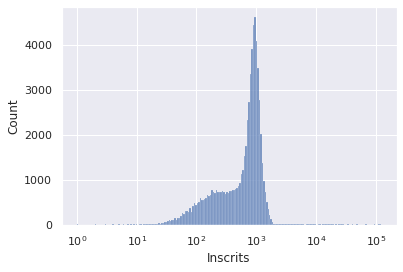

In [68]:
sns.histplot(df_macron+1, x="Inscrits", log_scale=True)

In [69]:
df_macron[df_macron["Inscrits"]<10]

,Inscrits,Abstentions,Unnamed: 39
2083,0,0,0
2358,1,1,0
4017,0,0,0
5290,1,0,0
5500,9,0,0
8744,0,0,0
11149,5,2,0
11381,6,5,0
12107,9,0,3
13095,4,2,0


In [70]:
df_macron[df_macron["Inscrits"]>10000]

,Inscrits,Abstentions,Unnamed: 39
51686,13673,2933,1907
69472,12775,8716,1595
69479,15789,13451,779
69482,21463,11914,4440
69496,34494,23885,4101
69498,19830,9497,4052
69499,18515,11539,4037
69507,97244,54509,16864
69515,16917,9102,3170
69526,16168,11370,1615


#### Ces outliers ne semblent pas être des valeurs aberrantes

### plot target (nombre de voix) vs variables choisies (Inscrits et abstentions)

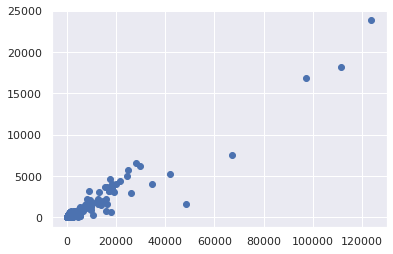

In [71]:
plt.scatter(df_macron["Inscrits"], df_macron["Unnamed: 39"])

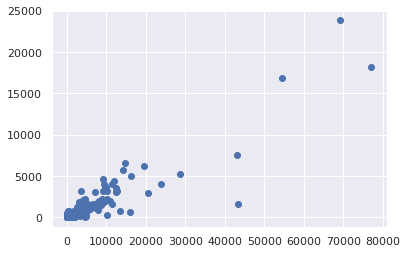

In [72]:
plt.scatter(df_macron["Abstentions"], df_macron["Unnamed: 39"])

In [73]:
df_macron['log_inscrits']=np.log(df_macron["Inscrits"]+1)
df_macron['log_inscrits']

0         6.470800
1         5.365976
2         7.029973
3         7.029088
4         7.101676
           ...    
69677    10.121377
69678     7.444249
69679     4.770685
69680     6.570883
69681     4.919981
Name: log_inscrits, Length: 69682, dtype: float64

In [74]:
df_macron['log_abs']=np.log(df_macron["Abstentions"]+1)
df_macron['log_voix']=np.log(df_macron["Unnamed: 39"]+1)

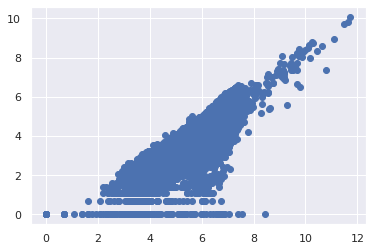

In [75]:
plt.scatter(df_macron["log_inscrits"], df_macron["log_voix"])

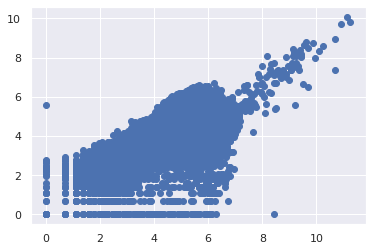

In [76]:
plt.scatter(df_macron["log_abs"], df_macron["log_voix"])

## 5 Question 5 : Création d'un modèle de machine learning

In [77]:
X=df_macron[["Inscrits", "Abstentions"]]
y=df_macron["Unnamed: 39"]

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=0)

In [79]:
#Import du LinearRegressor
from sklearn.linear_model import LinearRegression

In [80]:
lr=LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

### Coefficient of determination of the model :

In [82]:
lr.score(X_test,y_test)

0.8840317467923656

## 6. Question 6 : Calcul du coefficient de pearson

In [83]:
y_pred=lr.predict(X_test)

In [84]:
type(y_pred)

numpy.ndarray

In [85]:
y_pred=pd.Series(y_pred)

In [86]:
pearson=y_test.corr(y_pred)
pearson

-0.0023309003848738293

### Essai avec une autre colonne pour rendre compte de l'abstention et un standard scaler

In [87]:
df_macron=df_results[['Inscrits', '% Abs/Ins','Unnamed: 39']]
df_macron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69682 entries, 0 to 69681
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Inscrits     69682 non-null  int64 
 1   % Abs/Ins    69682 non-null  object
 2   Unnamed: 39  69682 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ MB


In [88]:
df_macron['% Abs/Ins']

0        16,74
1        17,84
2        23,56
3        23,49
4        20,28
         ...  
69677     56,7
69678    55,12
69679     54,7
69680    77,56
69681    57,35
Name: % Abs/Ins, Length: 69682, dtype: object

In [89]:
# y est de type object (string), il faut donc le convertir en float pour être utilisable pour le ML. 
# De plus le séparateur est , au lieu de .
df_macron['% Abs/Ins']=df_macron['% Abs/Ins'].apply(lambda x: x.replace(',','.'))
df_macron['% Abs/Ins']=df_macron['% Abs/Ins'].astype(float)
df_macron['% Abs/Ins'].describe()

count    69682.000000
mean        24.119217
std          9.962469
min          0.000000
25%         18.490000
50%         22.100000
75%         26.850000
max        100.000000
Name: % Abs/Ins, dtype: float64

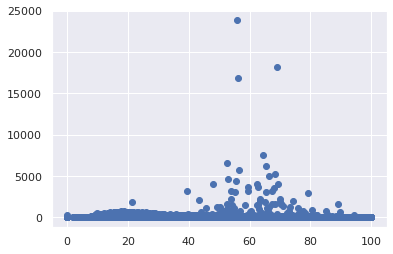

In [90]:
plt.scatter(df_macron["% Abs/Ins"], df_macron["Unnamed: 39"])

In [91]:
X=df_macron[["Inscrits", "% Abs/Ins"]]
y=df_macron["Unnamed: 39"]

In [92]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=0)

In [93]:
# Utilisation d'un standard scaler pour rapporter les variables à une même échelle
from sklearn.preprocessing import StandardScaler

In [94]:
sc=StandardScaler()

In [95]:
X_train_sc=sc.fit_transform(X_train)

In [97]:
X_test_sc=sc.transform(X_test)

In [98]:
lr_2=LinearRegression()

In [100]:
lr_2.fit(X_train_sc,y_train)

LinearRegression()

In [102]:
lr_2.score(X_test_sc,y_test)

0.8795985624762026